<h1 align = "center" style = "color:green"> The Bisection Method </h1>

---

In [7]:
# Import necessary modules
import numpy as np 
import matplotlib.pyplot as plt
try:
    plt.style.use(["science", "notebook", "grid", "dark_background"])
except:
    # Install scienceplots
    print("SciencePlots not installed. Installing...")
    import subprocess
    subprocess.run(["pip", "install", "scienceplots"])
    import scienceplots
    plt.style.use(["science", "notebook", "grid", "dark_background"])

The Bisection Method is a straightforward, reliable, and robust numerical technique used for finding a root (or zero) of a continuous function. This method is particularly useful when other methods like the Newton-Raphson method might fail due to derivative discontinuities or other complexities. Here's how the Bisection Method works:

### Basic Concept

The Bisection Method is based on the Intermediate Value Theorem, which states that a continuous function $f(x)$ that takes on different signs at two points $a$ and $b$ (i.e., $f(a)$ and $f(b)$ have opposite signs) must have at least one root in the interval $[a, b]$.

<img src = "../Bisection_method/images/bisection.gif" align = "top">


### Steps of the Bisection Method

1. **Initial Interval Selection**: Choose an initial interval $[a, b]$ where the function changes sign, meaning $ f(a) \cdot f(b) < 0$.

2. **Midpoint Calculation**: Find the midpoint $ c$ of the interval, where $ c = \frac{a + b}{2}$.

3. **Evaluation at Midpoint**: Evaluate the function at this midpoint, $ f(c)$.

4. **Interval Update**:
   - If $f(c)$ is close enough to zero (within a predefined tolerance), then $ c$ is considered a root, and the process stops.
   - If $f(c)$ has the same sign as $ f(a)$, update the interval to $[c, b]$.
   - If $f(c)$ has the same sign as $ f(b)$, update the interval to $[a, c]$.

5. **Iteration**: Repeat steps 2 to 4 until the desired accuracy is achieved (i.e., the width of the interval $[a, b$ becomes smaller than a predefined tolerance).
<img src = "../Bisection_method/images/flowchart.webp">

In [5]:
def bisection_method(f, lower_lim : float, high_lim : float, tolerance : float = 1e-8, iterations : int = 1000) -> float:
    """ This function implements the bisection method to find the root of a function f(x)
      in the interval [lower_lim, high_lim] with a tolerance of tolerance.
    Args:
        f (function): The function for which we want to find the root.
        lower_lim (float): The lower limit of the interval.
        high_lim (float): The upper limit of the interval.
        tolerance (float, optional): The tolerance of the method. Defaults to 1e-8.
        iterations (int, optional): The maximum number of iterations. Defaults to 1000.
    Returns:
        float: The root of the function.
    Raises:
        ValueError: If the root is not in the interval.
        ValueError: If the maximum number of iterations was reached.
    """
    # Check for symmetric function case
    if f((lower_lim  + high_lim)) == 0:
        return (lower_lim + high_lim) / 2
    
    # Check if the root is in the interval
    if f(lower_lim) * f(high_lim) >= 0:
        raise ValueError("The root is not in the interval.")
    
    # Initialize the variables
    middle_val = (lower_lim + high_lim) / 2

    # Iterate until the root is found
    # We check for 3 conditions for robustness:
    # 1. The function value is smaller than the tolerance
    # 2. The maximum number of iterations was reached
    # 3. The lower limit is smaller than the upper limit
    iters = 0
    while (abs(f(middle_val)) > tolerance) and (iterations > 0) and (lower_lim < high_lim):
        # Check if the root is in the left or right half of the interval
        if f(lower_lim) * f(middle_val) < 0:
            high_lim = middle_val # Set the new upper limit
        else:
            lower_lim = middle_val # f(lower_lim) * f(middle_val) > 0
        # Calculate the new middle value
        middle_val = (lower_lim + high_lim) / 2
        iterations -= 1 # Decrease the number of iterations
        iters += 1
    if iterations == 0:
        raise ValueError("The maximum number of iterations was reached.")
    print(f"Number of iterations: {iters}")
    return middle_val

The space and time complexity of the bisection method can be analyzed as follows:

### Time Complexity

1. **Basic Operations Per Iteration**: In each iteration of the bisection method, the primary operations are:
   - Evaluating the function `f` at the current midpoint.
   - Computing the midpoint of the current interval.
   - A couple of conditional checks and assignments.

2. **Number of Iterations**: The number of iterations required to achieve a given tolerance can be estimated. The interval is halved in each iteration. Therefore, to reach a tolerance `tol`, starting with an initial interval `[a, b]`, the method requires approximately $\log_2\left(\frac{b-a}{\text{tol}}\right)$ iterations. This logarithmic factor is the dominant part of the time complexity.

3. **Overall Time Complexity**: Considering the above points, the time complexity of the bisection method is $O(\log(\frac{1}{\text{tol}}))$. This assumes that the function `f` takes constant time to evaluate, which may not be the case for complex functions.

### Space Complexity

1. **Variables Used**: The algorithm uses a fixed amount of space for variables like `lower_lim`, `high_lim`, `middle_val`, and `iterations`. The space required does not depend on the size of the input interval or the tolerance.

2. **Function Evaluations**: The space complexity is also influenced by the space required to evaluate the function `f`. If `f` requires constant space, then the overall space complexity remains constant.

3. **Overall Space Complexity**: Therefore, the space complexity of the bisection method is $O(1)$, indicating that it requires constant space.

### Additional Considerations

- The actual running time can vary depending on the implementation of the function `f`. If `f` is computationally intensive, it can significantly affect the running time.
- In practice, the method is often limited by the maximum number of iterations rather than the tolerance, which can also influence the time complexity.
- The analysis assumes that arithmetic operations (addition, division, multiplication) take constant time, which is a standard assumption in complexity analysis but can vary for extremely large numbers or in certain computational environments.

## Visualizations

Number of iterations: 32
The root of the function is 2.0946
The function value at the root is -0.0000


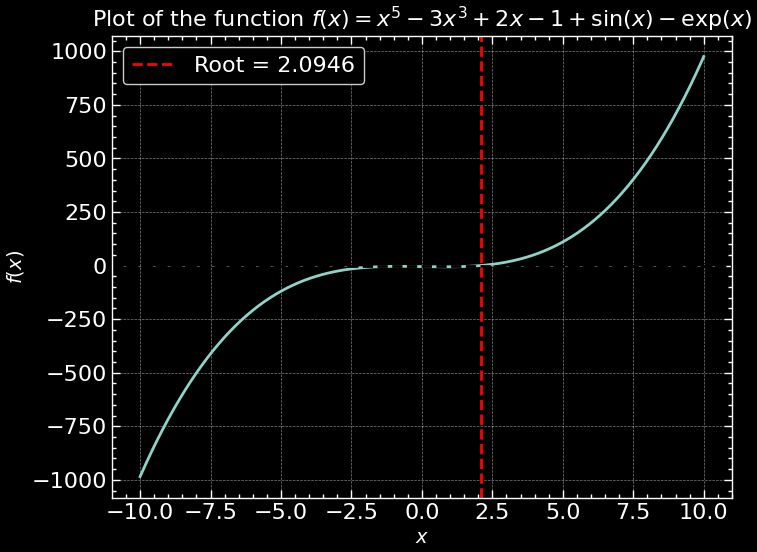

In [8]:
test_func = lambda x : x**3 - 2*x - 5 #x ** 5 - 3 * x ** 3 + 2 * x - 1 + np.sin(x) - np.exp(x)
x = np.linspace(-10, 10, 1000)

# Find the root of the function
root = bisection_method(test_func, -10, 10)
print(f"The root of the function is {root:.4f}")
print(f"The function value at the root is {test_func(root):.4f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, test_func(x))
plt.axhline(0, color="black", linestyle="--")
plt.axvline(root, color="red", linestyle="--", label=f"Root = {root:.4f}")
plt.xlabel("$x$", fontsize=14, fontweight="bold")
plt.ylabel("$f(x)$", fontsize=14, fontweight="bold")
plt.title("Plot of the function $f(x) = x^5 - 3x^3 + 2x - 1 + \sin(x) - \exp(x)$")
plt.legend();


### Features of the Bisection Method

- **Convergence**: The method is guaranteed to converge to a root if one exists within the interval and the function is continuous.
- **Rate of Convergence**: The method converges linearly, which is slower compared to methods like Newton-Raphson. However, its robustness often makes up for its slower convergence.
- **Simplicity**: The Bisection Method is easy to understand and implement, making it a good starting point for numerical root-finding.
- **Limitations**: It requires the initial interval to be chosen where the function changes sign, and it cannot detect multiple roots within the interval.

This method is widely used in various fields of science and engineering, particularly when a simple, reliable method is needed to find a root of a function.

### Conceptual Questions

1. **Understanding the Method**: Explain why the Bisection Method is guaranteed to converge to a root for a continuous function on an interval where the function changes sign.

2. **Comparison with Other Methods**: Compare and contrast the Bisection Method with the Newton-Raphson Method in terms of convergence speed, ease of implementation, and situations where one might be preferred over the other.

3. **Convergence Criteria**: Discuss the importance of the convergence criteria in the Bisection Method. What might happen if the tolerance level is set too high or too low?

4. **Error Analysis**: How does the error decrease in each iteration of the Bisection Method? Is the rate of convergence affected by the choice of the initial interval?

5. **Limitations**: What are the limitations of the Bisection Method? Provide examples where this method may not be suitable or efficient.

### Practical Exercises

1. **Implement the Method**: Write a Python function to implement the Bisection Method. Test your implementation with the function $ f(x) = x^2 - 4 $ and find the root in the interval $[1, 5]$.

2. **Analyzing Convergence**: For the function $ f(x) = \sin(x) $, use the Bisection Method to find a root in the interval $[2, 4]$. Record the number of iterations it takes to achieve a tolerance of $1e-6$. 

3. **Effect of Initial Interval**: Use the Bisection Method to find a root of $ f(x) = e^{-x} - x $. Experiment with different initial intervals (e.g., $[0, 1]$, $[0, 2]$, $[0, 3]$) and discuss how the choice of the interval affects the number of iterations.

4. **Handling Special Cases**: Modify your Bisection Method implementation to handle cases where the function value at one of the interval endpoints is zero. Test this with $ f(x) = x^3 - 7x^2 + 14x - 8 $ in the interval $[0, 4]$.

5. **Real-World Application**: Apply the Bisection Method to a real-world problem, such as finding the interest rate required to reach a certain investment goal given a fixed investment period and regular contributions. Model this as a function where the root represents the desired interest rate.